# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#To make sure all the columns are visible

pd.set_option('display.max_columns',False)

## Loading The Data

In [4]:
lead_df=pd.read_csv('Leads.csv') # Reading leads dataframe as lead_df


## Reading and Understanding the Data

In [5]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Inference : Inspecing the various aspects of the data dataframe

# Data Inspection and Basic Sanity Check

In [6]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Getting the summary of the dataframe using 'describe()'

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Geting the shape of the dataset

lead_df.shape

(9240, 37)

Inference : We have noted the dataframe contains some Select values it means these are the Missing values

## Data Cleaning

In [9]:
# Replacing Select values with nan values

lead_df = lead_df.replace('Select', np.nan)

In [10]:
# Checking whether if there is any missing value.

round(100*(lead_df.isnull().sum()/len(lead_df.index)),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

Inference: we found that lots of Missing values are there it should be treated well

In [11]:
# Checking for duplicates values

lead_df.loc[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


## Droping the Columns for large number of Missing Values

In [12]:
# Removing columns whch column containd more than 40% of Missing Values

cols=lead_df.columns[round((lead_df.isnull().sum()/len(lead_df))*100)>=40]
lead_df=lead_df.drop(cols,1)

In [13]:
# dropping 'Tags' as these features is derived by sales team

lead_df.drop('Tags',1,inplace=True)

In [14]:
# Finding the Labels contains in the Country Variable

lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
South Africa               4
Canada                     4
Kuwait                     4
Nigeria                    4
Sweden                     3
China                      2
Philippines                2
Uganda                     2
Asia/Pacific Region        2
Bangladesh                 2
Italy                      2
Netherlands                2
Belgium                    2
Ghana                      2
Switzerland                1
Russia                     1
Sri Lanka                  1
Tanzania                   1
Liberia                    1
Indonesia                  1
Malaysia      

In [15]:
# imputing  "India" as its common occurance in Country Column

lead_df['Country']=lead_df['Country'].replace(np.nan,'India')

In [16]:
# Finding the Labels contains in the Specialization Variable

lead_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [17]:
# Imputing  "Finance Management" as its common occurance in Specialization Column

lead_df['Specialization']=lead_df['Specialization'].replace(np.nan,'Finance Management')

In [18]:
# Finding the Labels contains in the "What is your current occupation" Variable

lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
# Imputing  "Unemployed" as its common occurance in What is your current occupation Column

lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [20]:
# Finding the Labels contains in the "What matters most to you in choosing a course" Variable

lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
# Dropping "What matters most to you in choosing a course" as we have almost same value for colums

lead_df.drop('What matters most to you in choosing a course',1,inplace=True)

In [22]:
# Finding the Labels contains in the "Last Activity Variable

lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [23]:
# Imputing "Email Opened" as its common occurance in Last Activity Column

lead_df['Last Activity']=lead_df['Last Activity'].fillna('Email Opened')

In [24]:
# Finding the Labels contains in the "Last Activity Variable

lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
testone                 1
NC_EDM                  1
welearnblog_Home        1
blog                    1
Name: Lead Source, dtype: int64

In [25]:
# imputing  "Google" as its common occurance in Lead Source Column

lead_df['Lead Source']=lead_df['Lead Source'].replace(np.nan,'Google')

In [26]:
# here we have found that google and Google is same just a typo hence we replaced it google to Google.

lead_df['Lead Source']=lead_df['Lead Source'].replace('google','Google')

In [27]:
lead_df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

## Finding the outliers

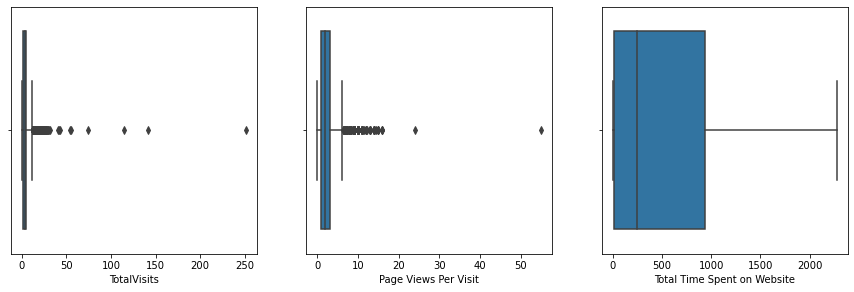

In [28]:
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(lead_df['TotalVisits'])
plt.subplot(2,3,2)
sns.boxplot(lead_df['Page Views Per Visit'])
plt.subplot(2,3,3)
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

Inference: Outliers are Present in both the Variables TotalVisits and Page Views Per Visit it should be treated and the value spreaded above median highly in Total Time Spent on Website


## Imputing Median to the Misssing values

In [29]:
# Imputing Median as it is a Continueous type

lead_df['TotalVisits']=lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median())
lead_df['Page Views Per Visit']=lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median())

In [30]:
lead_df[pd.isnull(lead_df).any(axis=1)==True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


## Reinspecting Null Values

In [31]:
round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Inference: No Null Values are remaining in the dataset

In [32]:
# making lead number as index

lead_df=lead_df.set_index('Lead Number')
lead_df.drop(['Prospect ID'],1,inplace=True)

In [33]:
# Storing column with dtype object and column with dtype number in two different list, so we can easily Perform analysis

col_obj=list(lead_df.loc[:, lead_df.dtypes == np.object].columns)
col_num=list(lead_df.loc[:, lead_df.dtypes == np.int64].columns)
col_num+=(list(lead_df.loc[:, lead_df.dtypes == np.number].columns))
print('columns with object dtype \n {} \n \n columns with number dtype \n {}'.format(col_obj,col_num))

columns with object dtype 
 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 
 
 columns with number dtype 
 ['Converted', 'Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']


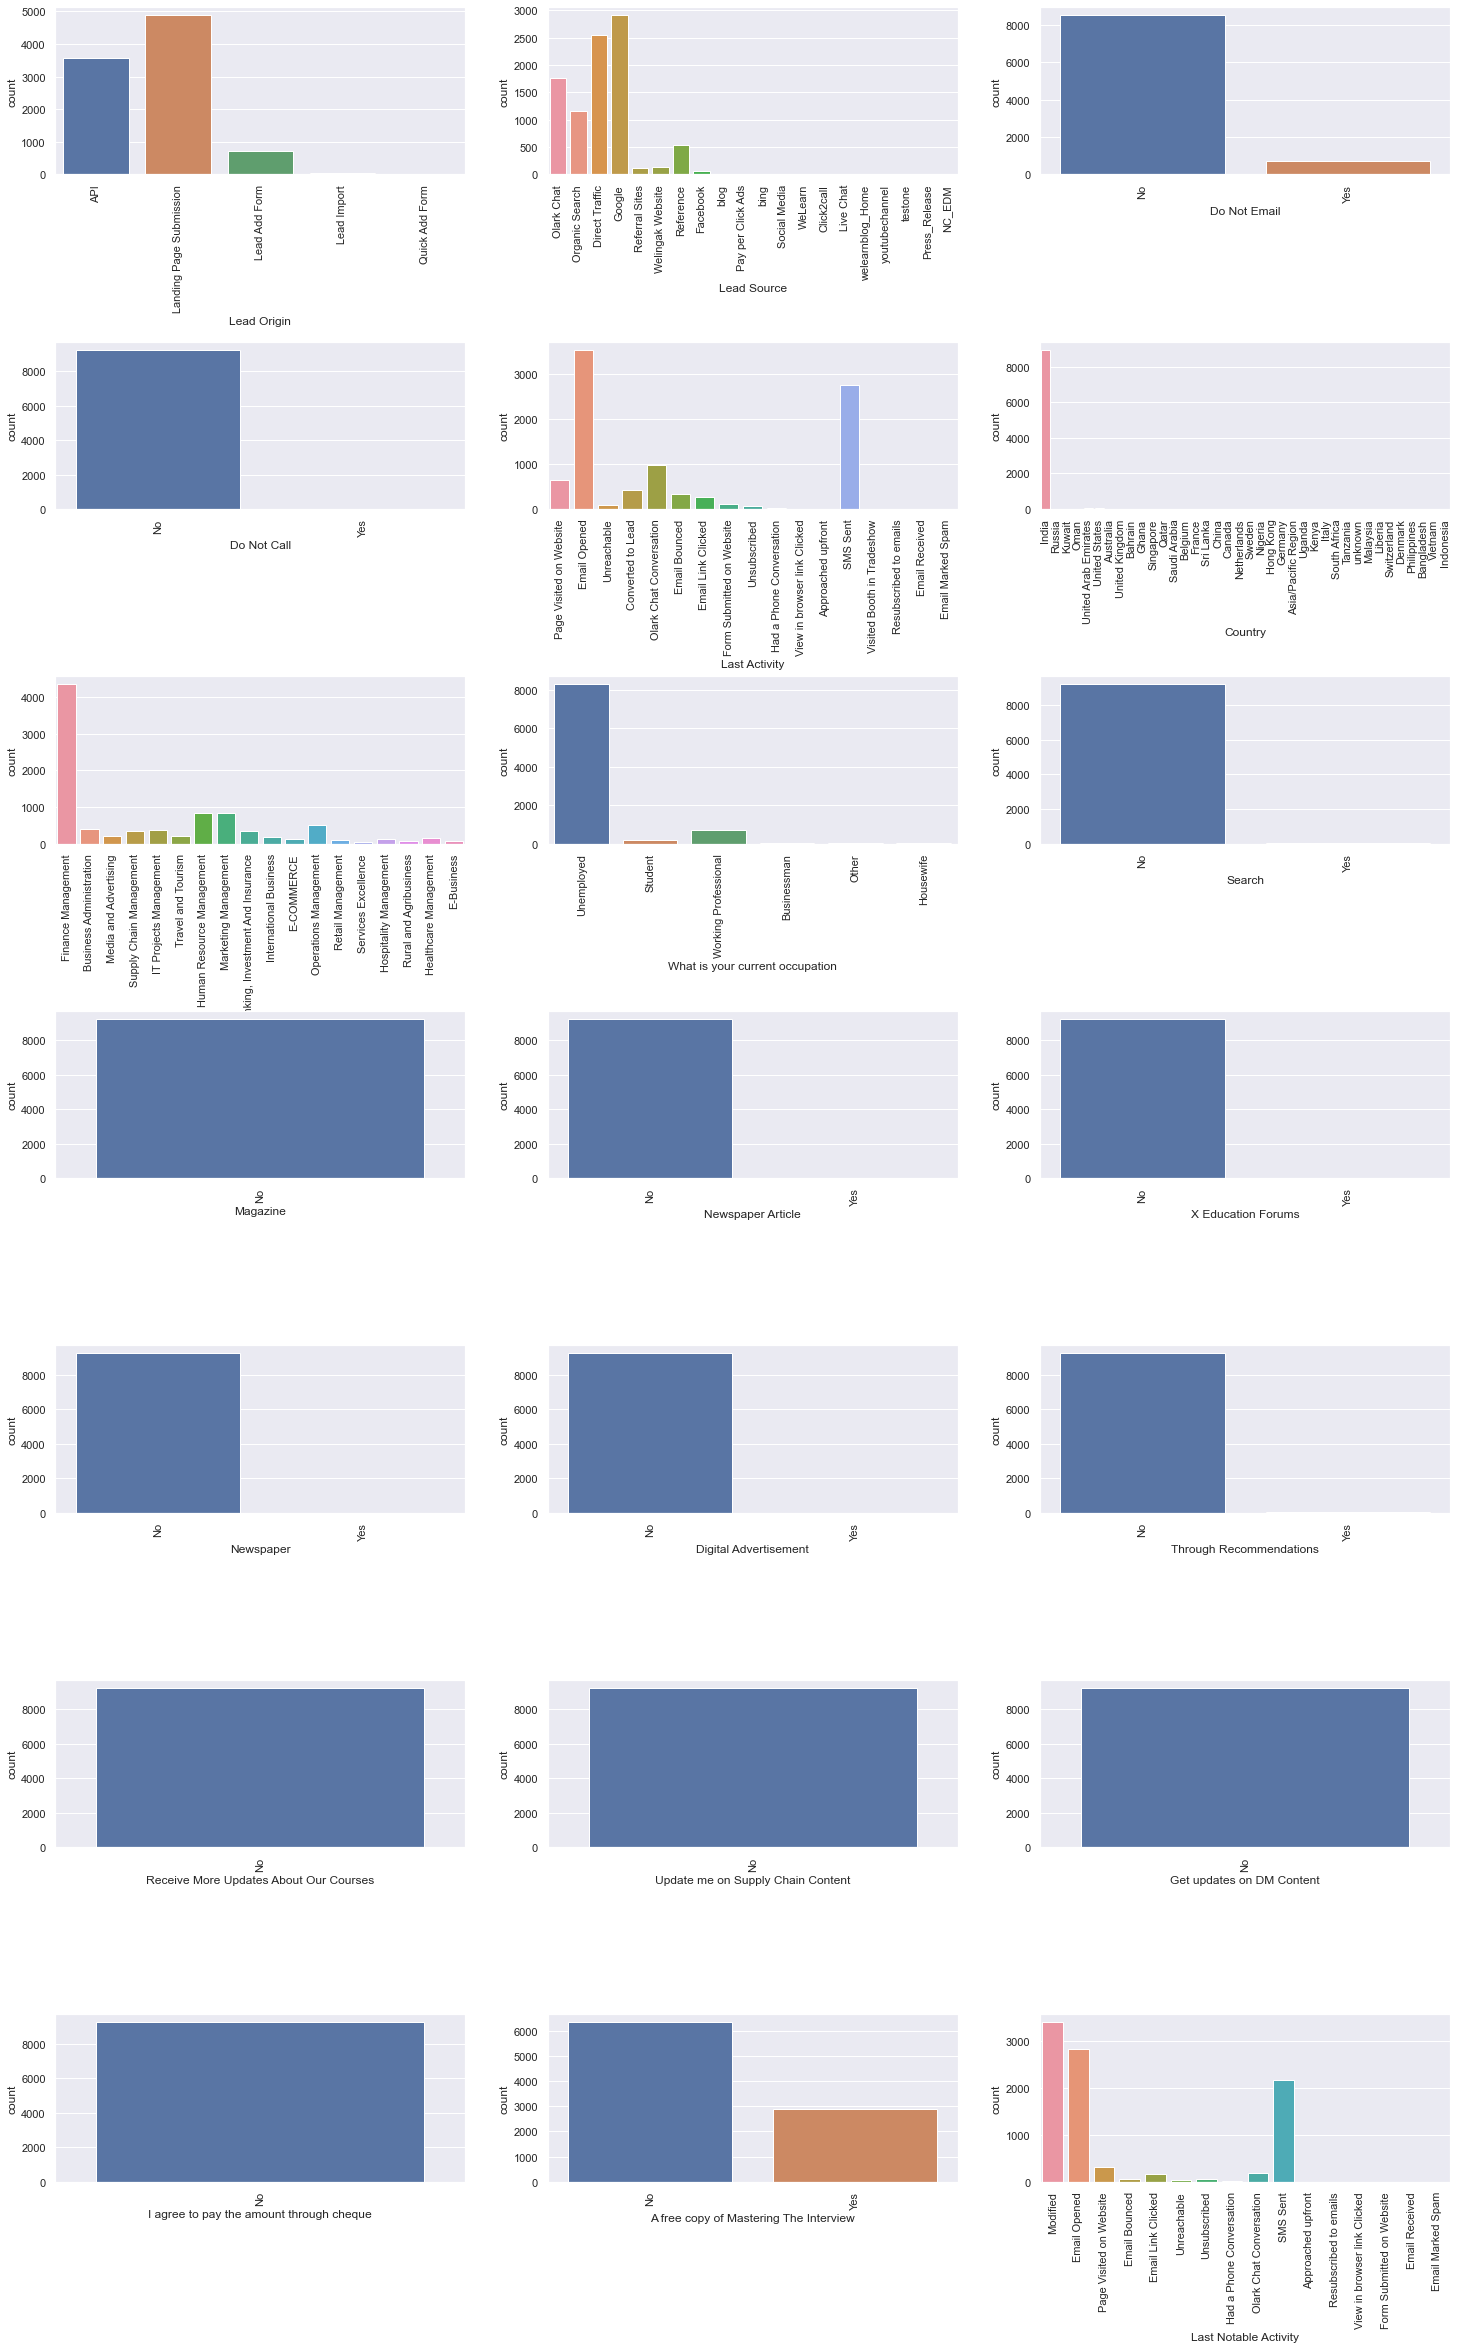

In [34]:
# plotting countplot for object dtype and histogram for number to get data distribution

plt.figure(figsize=(25,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(col_obj):
    plt.subplot(7,3, i[0]+1)
    sns.countplot(i[1],data=lead_df) 
    plt.xticks(rotation=90)
plt.show()

Insights: 
We can see that there are many colums which are highly skewed or only one values i.e 'Magazine'

we Can remove these colums as this will not help in model building.

There are cloumns which have many categories(>5), here we can impute new value 'Other' for which are occured less.

Removing Highly Skewed variables and if Column contains Single Labels

In [35]:
# Taking care of highly skewed columns  and one value only

lead_df=lead_df.drop(['What is your current occupation','Do Not Call','Do Not Email','Country','Search',\
                      'X Education Forums','Newspaper','Newspaper Article','Through Recommendations','Digital Advertisement'],1)

In [36]:
# Droping those variables which contains two labels but one is very High and another is very less number of labels.

lead_df=lead_df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',\
                      'Get updates on DM Content','I agree to pay the amount through cheque', ],1)
col_obj=lead_df.loc[:, lead_df.dtypes == np.object].columns

Inference: Maintaing the labels which Column contains lots of labels

In [37]:
# changing categories which are occured less than 1000

col_dict_ls=dict(lead_df['Lead Source'].value_counts()<1000)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'

for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        lead_df['Lead Source']=lead_df['Lead Source'].replace(i,'Other')

In [38]:
# Changing categories which are occured less than 300

col_dict_la=dict(lead_df['Last Activity'].value_counts()<300)

# labels which are occured less like Resubscribed to emails ,Visited Booth in Tradeshow...those are impute to 'Other'

for i in col_dict_la.keys():
    if col_dict_la[i]==True:
        lead_df['Last Activity']=lead_df['Last Activity'].replace(i,'Other')

In [39]:
# Changing categories which are occured less than 500
col_dict_lna=dict(lead_df['Last Notable Activity'].value_counts()<500)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'

for i in col_dict_lna.keys():
    if col_dict_lna[i]==True:
        lead_df['Last Notable Activity']=lead_df['Last Notable Activity'].replace(i,'Other')

In [40]:
# Changing categories which are occured less than 350
col_dict_spec=dict(lead_df['Specialization'].value_counts()<350)

# labels which are occured less like E-Business,Retail Management we can impute to 'Other'

for i in col_dict_spec.keys():
    if col_dict_spec[i]==True:
        lead_df['Specialization']=lead_df['Specialization'].replace(i,'Other')

## Step : 3 Exploratory Data Analysis
Univariate Analysis (Categorical)

In [41]:
# crating cols which contains only Categorical variable

cols=lead_df.loc[:, lead_df.dtypes == np.object].columns
cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

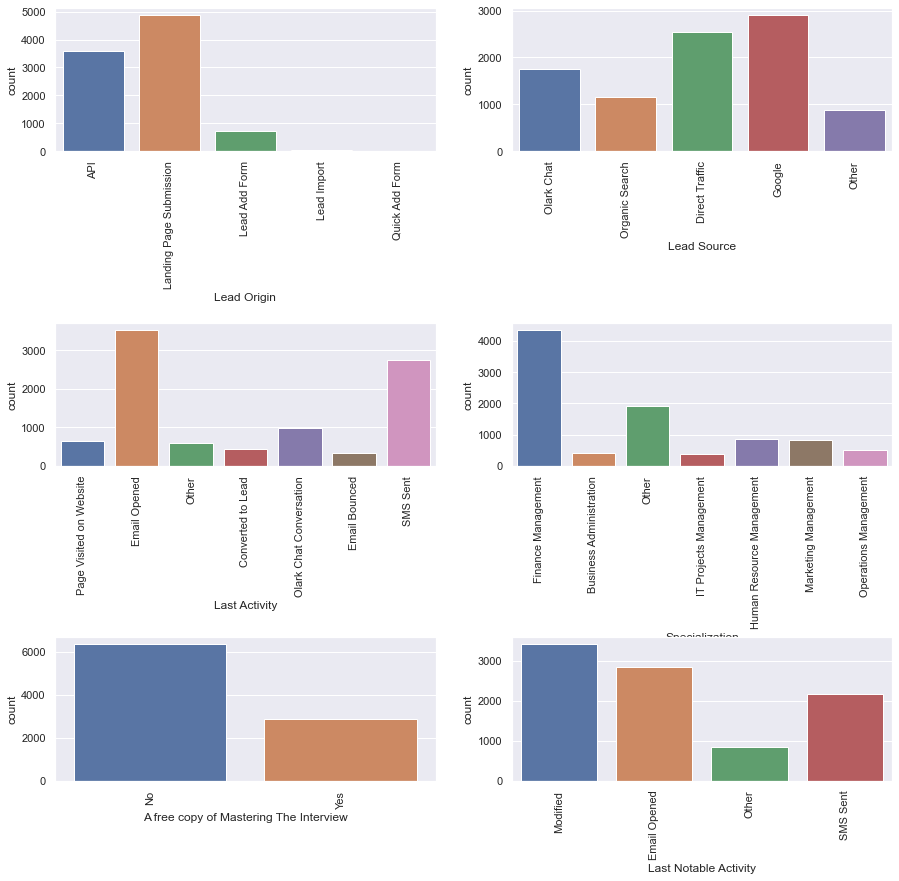

In [42]:
plt.figure(figsize=(15,20))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(i[1],data=lead_df)
    plt.xticks(rotation=90)
plt.show()

Insights :-
- In Lead Source Direct Traffic and Google are the two main source for Leads
- The Number of values is High in Email Opened and SMS Sent in Last Activity
- Most of the people chooses Finance Management Specialization rather than other Specialization
- The IT Project management have very lees so that most of the People not prefered this Specialization

## Univariate Analysis(Continous)

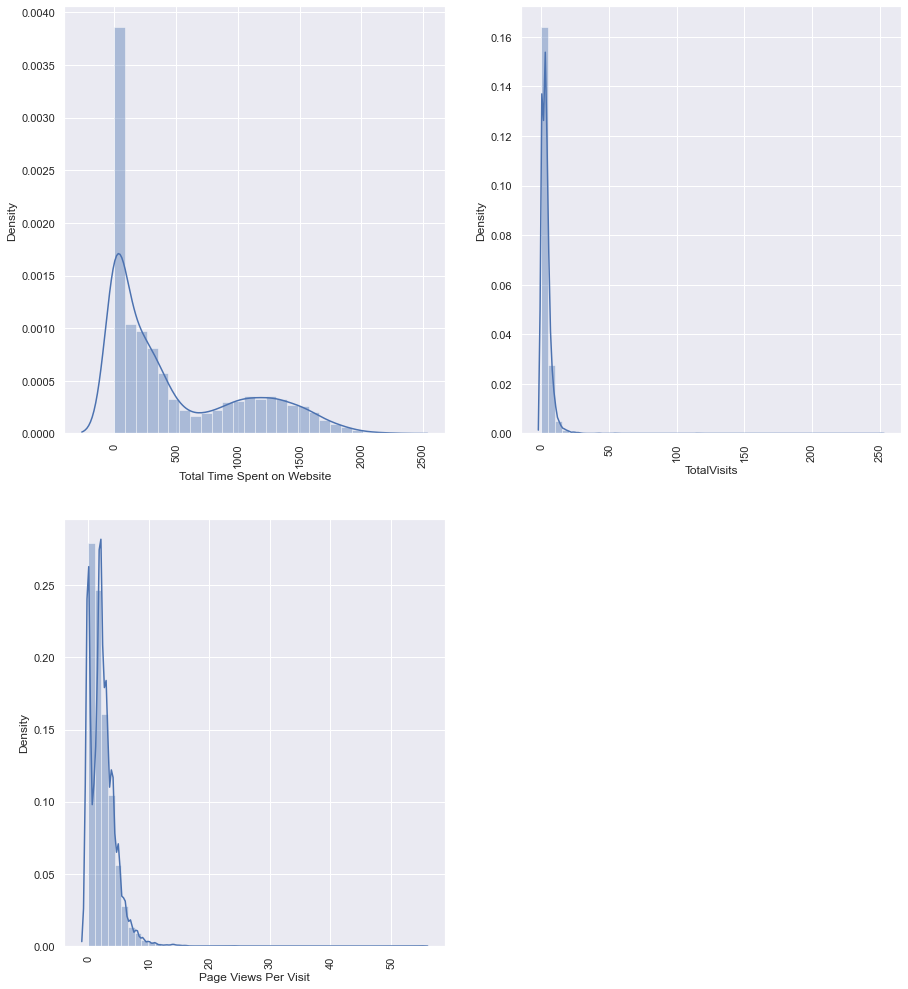

In [43]:
col_num.remove('Converted')

plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(col_num):
    
    plt.subplot(2,2, i[0]+1)
    sns.distplot(lead_df[i[1]])
    
    plt.xticks(rotation=90)
    
# plt.savefig('coniouus_univar.png',dpi=300,transparent=True)

plt.show()

Insights :-
None of the Continueous Variables are in Normal distribution

Presence of Outliers in Total Visits and Page Views Per Visit

In total visits more values is between 0-50 and page views per visits 0-20

## Bivariate Analysis
Bivariate Analysis With respect to Target Column Converted

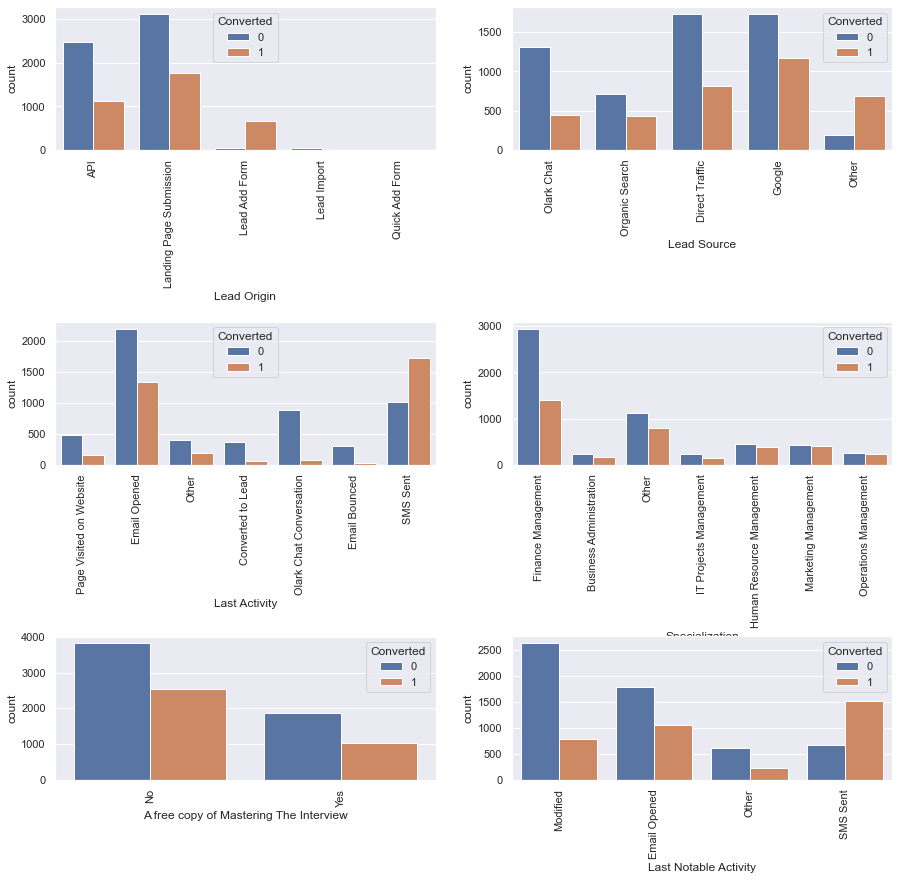

In [44]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = lead_df)
    plt.xticks(rotation=90)
    
# plt.savefig('cate bivar.png',dpi=300,transparent=True)

plt.show()

Insights :-
In Lead Source The number of Hot leads is higher in Direct Traffic and Google less in Other Category

In Last Activity the number of Hot leads is higher in SMS and in EMAIL cold leads is higher than hot leads.

In Last Notable Activity it's mostly same as Last Activity.

In Specialization the most of the leads are comes from Finance management but here Hot leads are lesseer than Cold leads.

## Step : 4 Data Preparation and Features Selection

In [45]:
lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,No,Modified


In [46]:
# mapping of columns

lead_df['A free copy of Mastering The Interview']=lead_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [47]:
# Dropping the Last Notable Activity as it is mostly same Last Activity

lead_df.drop('Last Notable Activity',1,inplace=True)

Creating dummies of Categorical Variables

In [48]:
dummies_df=pd.get_dummies(lead_df)
dummies_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
660727,1,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
660719,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
660681,1,2.0,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [49]:
# dropping columns on basis of anal
# dropping columns on basis of anal

dummies_df=dummies_df.drop(['A free copy of Mastering The Interview','Lead Origin_Lead Add Form','Lead Source_Organic Search','Last Activity_Email Opened','Specialization_Operations Management'],1)


## Splitting the Data into Training and Testing Sets

In [50]:
X=dummies_df.iloc[:,1:]
y=dummies_df[['Converted']]

In [51]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7,test_size=.3,random_state=1)

### scaling the Features

In [52]:
scaler=StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=\
scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

### Correlation

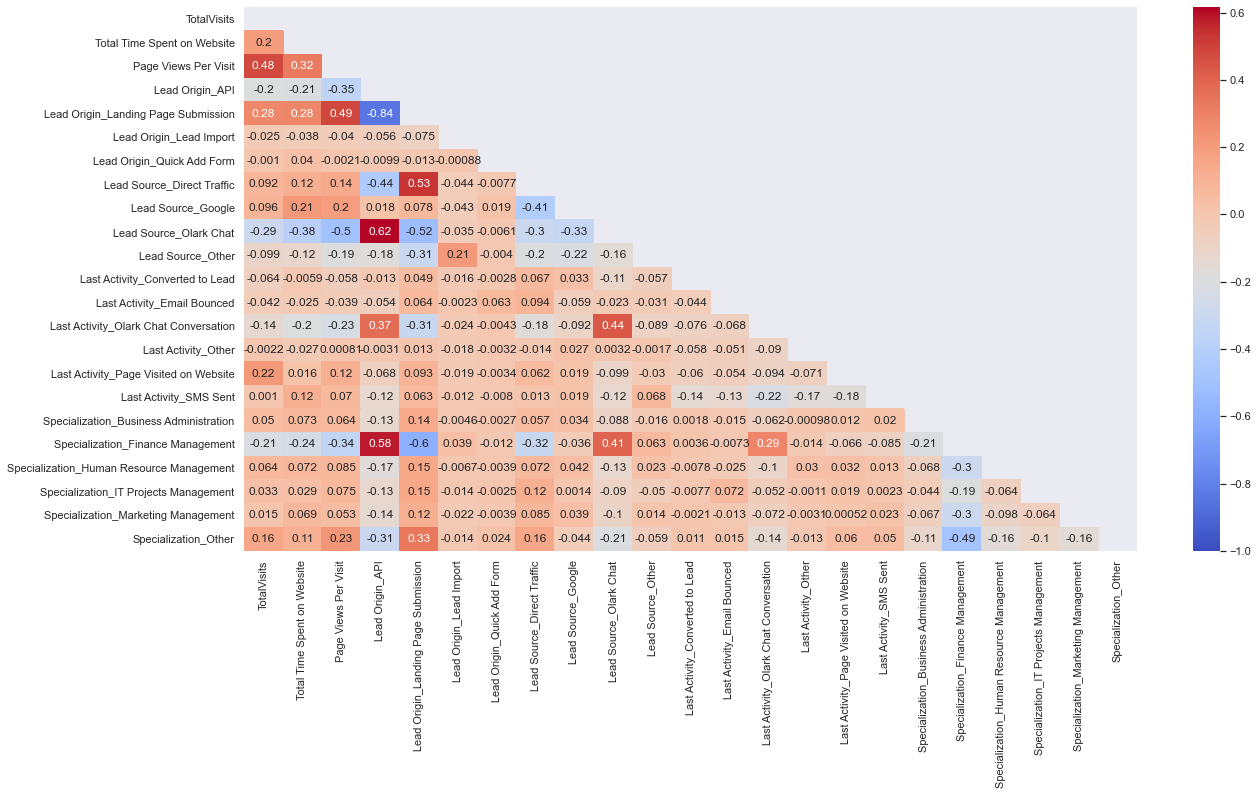

In [53]:
# Finding the Correlation using HeatMap

plt.figure(figsize = (20, 10))
mask = np.zeros(X_train.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(X_train.corr(), annot = True, vmin=-1,cmap='coolwarm',mask=mask)
plt.show()

Inference : We can see some columns are highly correlated

we will let RFE to decide to drop columns or not

In [54]:
# Using rfe for features selection

logreg=LogisticRegression()


In [55]:
# Running RFE with the output number of the variable equal to 20

rfe=RFE(logreg)    
rfe=rfe.fit(X_train,y_train)

In [56]:
rfe.support_

array([False,  True, False,  True,  True,  True, False, False, False,
        True, False,  True,  True,  True, False,  True,  True, False,
        True, False, False, False, False])

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 12),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Other', False, 2),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', False, 4),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 7),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', False, 9),
 ('Specialization_IT Projects Management', False, 11),
 ('Specialization_Marketing Management', False, 13),
 ('Specialization_Other', False, 8)]

In [58]:
# After used RFE here RFE selected these variables should be used for modeling

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Finance Management'],
      dtype='object')

In [59]:
# After used RFE here RFE selected these variables should not be used for modeling

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Other',
       'Last Activity_Other', 'Specialization_Business Administration',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management', 'Specialization_Other'],
      dtype='object')

## Building a Logistic Regression using statsmodel, for the detailed statistics

## Model 1

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2927.8
Date:                Mon, 23 Jan 2023   Deviance:                       5855.5
Time:                        19:04:03   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1343      0.183     17.090      0.000       2.775       3.494
Total Time Spent on Website               1.1099      0.038     29.054      0.000       1.035       1.185
Lead Origin_API                          -3.7826      0.193    -19.618      0.000      -4.161      -3.405
Lead Origin_Landing Page Submission      -4.2540      0.187    -22.778      0.000      -4.620      -3.888
Lead Origin_Lead Import                  -3.8017      0.500     -7.605      0.000      -4.782      -2.822
Lead Source_Olark Chat                    0.9961      0.116      8.593      0.000       0.769       1.223
Last Activity_Converted to Lead          -1.0731      0.196     -5.466      0.000      -1.458      -0.688
Last Activity_Email Bounced              -1.8424      0.278     -6.637      0.000      -2.386      -1.298
Last Activity_Olark Chat Conversation    -1.7335      0.167    -10.410      0.000      -2.060      -1.407
Last Activity_Page Visited on Website    -0.5989      0.141     -4.249      0.000      -0.875      -0.323
Last Activity_SMS Sent                    1.1053      0.072     15.328      0.000       0.964       1.247
Specialization_Finance Management        -0.4700      0.084     -5.583      0.000      -0.635      -0.305
=========================================================================================================
"""

In [61]:
# function to calculate vif

def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [62]:
# Calculate the VIFs for the new model

vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_API,3.80
10,Specialization_Finance Management,2.79
4,Lead Source_Olark Chat,2.47
2,Lead Origin_Landing Page Submission,1.74
9,Last Activity_SMS Sent,1.53
7,Last Activity_Olark Chat Conversation,1.51
0,Total Time Spent on Website,1.24
8,Last Activity_Page Visited on Website,1.16
5,Last Activity_Converted to Lead,1.13
6,Last Activity_Email Bounced,1.09


### Model 2

In [63]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2927.8
Date:                Mon, 23 Jan 2023   Deviance:                       5855.5
Time:                        19:04:03   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1343      0.183     17.090      0.000       2.775       3.494
Total Time Spent on Website               1.1099      0.038     29.054      0.000       1.035       1.185
Lead Origin_API                          -3.7826      0.193    -19.618      0.000      -4.161      -3.405
Lead Origin_Landing Page Submission      -4.2540      0.187    -22.778      0.000      -4.620      -3.888
Lead Origin_Lead Import                  -3.8017      0.500     -7.605      0.000      -4.782      -2.822
Lead Source_Olark Chat                    0.9961      0.116      8.593      0.000       0.769       1.223
Last Activity_Converted to Lead          -1.0731      0.196     -5.466      0.000      -1.458      -0.688
Last Activity_Email Bounced              -1.8424      0.278     -6.637      0.000      -2.386      -1.298
Last Activity_Olark Chat Conversation    -1.7335      0.167    -10.410      0.000      -2.060      -1.407
Last Activity_Page Visited on Website    -0.5989      0.141     -4.249      0.000      -0.875      -0.323
Last Activity_SMS Sent                    1.1053      0.072     15.328      0.000       0.964       1.247
Specialization_Finance Management        -0.4700      0.084     -5.583      0.000      -0.635      -0.305
=========================================================================================================
"""

In [64]:
# Calculate the VIFs for the new model

vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_API,3.80
10,Specialization_Finance Management,2.79
4,Lead Source_Olark Chat,2.47
2,Lead Origin_Landing Page Submission,1.74
9,Last Activity_SMS Sent,1.53
7,Last Activity_Olark Chat Conversation,1.51
0,Total Time Spent on Website,1.24
8,Last Activity_Page Visited on Website,1.16
5,Last Activity_Converted to Lead,1.13
6,Last Activity_Email Bounced,1.09


### Model 3

In [65]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2927.8
Date:                Mon, 23 Jan 2023   Deviance:                       5855.5
Time:                        19:04:03   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1343      0.183     17.090      0.000       2.775       3.494
Total Time Spent on Website               1.1099      0.038     29.054      0.000       1.035       1.185
Lead Origin_API                          -3.7826      0.193    -19.618      0.000      -4.161      -3.405
Lead Origin_Landing Page Submission      -4.2540      0.187    -22.778      0.000      -4.620      -3.888
Lead Origin_Lead Import                  -3.8017      0.500     -7.605      0.000      -4.782      -2.822
Lead Source_Olark Chat                    0.9961      0.116      8.593      0.000       0.769       1.223
Last Activity_Converted to Lead          -1.0731      0.196     -5.466      0.000      -1.458      -0.688
Last Activity_Email Bounced              -1.8424      0.278     -6.637      0.000      -2.386      -1.298
Last Activity_Olark Chat Conversation    -1.7335      0.167    -10.410      0.000      -2.060      -1.407
Last Activity_Page Visited on Website    -0.5989      0.141     -4.249      0.000      -0.875      -0.323
Last Activity_SMS Sent                    1.1053      0.072     15.328      0.000       0.964       1.247
Specialization_Finance Management        -0.4700      0.084     -5.583      0.000      -0.635      -0.305
=========================================================================================================
"""

In [66]:
# Calculate the VIFs for the new model

vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_API,3.80
10,Specialization_Finance Management,2.79
4,Lead Source_Olark Chat,2.47
2,Lead Origin_Landing Page Submission,1.74
9,Last Activity_SMS Sent,1.53
7,Last Activity_Olark Chat Conversation,1.51
0,Total Time Spent on Website,1.24
8,Last Activity_Page Visited on Website,1.16
5,Last Activity_Converted to Lead,1.13
6,Last Activity_Email Bounced,1.09


### Model 4

In [67]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2927.8
Date:                Mon, 23 Jan 2023   Deviance:                       5855.5
Time:                        19:04:03   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1343      0.183     17.090      0.000       2.775       3.494
Total Time Spent on Website               1.1099      0.038     29.054      0.000       1.035       1.185
Lead Origin_API                          -3.7826      0.193    -19.618      0.000      -4.161      -3.405
Lead Origin_Landing Page Submission      -4.2540      0.187    -22.778      0.000      -4.620      -3.888
Lead Origin_Lead Import                  -3.8017      0.500     -7.605      0.000      -4.782      -2.822
Lead Source_Olark Chat                    0.9961      0.116      8.593      0.000       0.769       1.223
Last Activity_Converted to Lead          -1.0731      0.196     -5.466      0.000      -1.458      -0.688
Last Activity_Email Bounced              -1.8424      0.278     -6.637      0.000      -2.386      -1.298
Last Activity_Olark Chat Conversation    -1.7335      0.167    -10.410      0.000      -2.060      -1.407
Last Activity_Page Visited on Website    -0.5989      0.141     -4.249      0.000      -0.875      -0.323
Last Activity_SMS Sent                    1.1053      0.072     15.328      0.000       0.964       1.247
Specialization_Finance Management        -0.4700      0.084     -5.583      0.000      -0.635      -0.305
=========================================================================================================
"""

In [68]:
# Calculate the VIFs for the new model

vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_API,3.80
10,Specialization_Finance Management,2.79
4,Lead Source_Olark Chat,2.47
2,Lead Origin_Landing Page Submission,1.74
9,Last Activity_SMS Sent,1.53
7,Last Activity_Olark Chat Conversation,1.51
0,Total Time Spent on Website,1.24
8,Last Activity_Page Visited on Website,1.16
5,Last Activity_Converted to Lead,1.13
6,Last Activity_Email Bounced,1.09


### Model 5

In [69]:
X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.14922
Method:                          IRLS   Log-Likelihood:                -3019.6
Date:                Mon, 23 Jan 2023   Deviance:                       963.39
Time:                        19:04:04   Pearson chi2:                     963.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.9696      0.020     49.687      0.000       0.931       1.008
Total Time Spent on Website               0.1998      0.005     37.026      0.000       0.189       0.210
Lead Origin_API                          -0.6075      0.021    -28.518      0.000      -0.649      -0.566
Lead Origin_Landing Page Submission      -0.6863      0.020    -35.132      0.000      -0.725      -0.648
Lead Origin_Lead Import                  -0.6258      0.071     -8.873      0.000      -0.764      -0.488
Lead Source_Olark Chat                    0.1553      0.017      9.074      0.000       0.122       0.189
Last Activity_Converted to Lead          -0.1405      0.024     -5.937      0.000      -0.187      -0.094
Last Activity_Email Bounced              -0.2012      0.026     -7.772      0.000      -0.252      -0.150
Last Activity_Olark Chat Conversation    -0.2096      0.018    -11.545      0.000      -0.245      -0.174
Last Activity_Page Visited on Website    -0.0948      0.020     -4.805      0.000      -0.134      -0.056
Last Activity_SMS Sent                    0.2130      0.011     18.537      0.000       0.190       0.235
Specialization_Finance Management        -0.0763      0.012     -6.176      0.000      -0.101      -0.052
=========================================================================================================
"""

In [70]:
# Calculate the VIFs for the new model

vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_API,3.80
10,Specialization_Finance Management,2.79
4,Lead Source_Olark Chat,2.47
2,Lead Origin_Landing Page Submission,1.74
9,Last Activity_SMS Sent,1.53
7,Last Activity_Olark Chat Conversation,1.51
0,Total Time Spent on Website,1.24
8,Last Activity_Page Visited on Website,1.16
5,Last Activity_Converted to Lead,1.13
6,Last Activity_Email Bounced,1.09


### Model 6

In [71]:
X_train_sm=sm.add_constant(X_train[col])
logm6=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.14922
Method:                          IRLS   Log-Likelihood:                -3019.6
Date:                Mon, 23 Jan 2023   Deviance:                       963.39
Time:                        19:04:04   Pearson chi2:                     963.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.9696      0.020     49.687      0.000       0.931       1.008
Total Time Spent on Website               0.1998      0.005     37.026      0.000       0.189       0.210
Lead Origin_API                          -0.6075      0.021    -28.518      0.000      -0.649      -0.566
Lead Origin_Landing Page Submission      -0.6863      0.020    -35.132      0.000      -0.725      -0.648
Lead Origin_Lead Import                  -0.6258      0.071     -8.873      0.000      -0.764      -0.488
Lead Source_Olark Chat                    0.1553      0.017      9.074      0.000       0.122       0.189
Last Activity_Converted to Lead          -0.1405      0.024     -5.937      0.000      -0.187      -0.094
Last Activity_Email Bounced              -0.2012      0.026     -7.772      0.000      -0.252      -0.150
Last Activity_Olark Chat Conversation    -0.2096      0.018    -11.545      0.000      -0.245      -0.174
Last Activity_Page Visited on Website    -0.0948      0.020     -4.805      0.000      -0.134      -0.056
Last Activity_SMS Sent                    0.2130      0.011     18.537      0.000       0.190       0.235
Specialization_Finance Management        -0.0763      0.012     -6.176      0.000      -0.101      -0.052
=========================================================================================================
"""

In [72]:
# Calculate the VIFs for the new model

vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_API,3.80
10,Specialization_Finance Management,2.79
4,Lead Source_Olark Chat,2.47
2,Lead Origin_Landing Page Submission,1.74
9,Last Activity_SMS Sent,1.53
7,Last Activity_Olark Chat Conversation,1.51
0,Total Time Spent on Website,1.24
8,Last Activity_Page Visited on Website,1.16
5,Last Activity_Converted to Lead,1.13
6,Last Activity_Email Bounced,1.09


In [73]:
# Prediciting values on ytrain

y_train_pred = logm6.predict(X_train_sm).values.reshape(-1)

In [74]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.162049,609431
1,0,0.054279,631817
2,0,0.032392,596164
3,0,0.134070,646570
4,0,0.018993,643974


In [75]:
#  let's take 0.5 as Cutoff

y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)

In [76]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred
0,0,0.162049,609431,0
1,0,0.054279,631817,0
2,0,0.032392,596164,0
3,0,0.134070,646570,0
4,0,0.018993,643974,0


In [77]:
# Finding the metrics like accuracy, sensitivity and specicity 

def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [78]:
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)

print('Accuracy: {}, Sensitivity {}, specitiy {}'.format(acc,sensi,speci))

Accuracy: 0.787569573283859, Sensitivity 0.6240875912408759, specitiy 0.8883058470764618


 Inference : we got low Sensitivity when randomly take the Cutoff as 0.5

In [79]:
# Finding the Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3555,  447],
       [ 927, 1539]], dtype=int64)

In [80]:
# Finding the TP, TN, FP, FN

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [81]:
# Calculate false postive rate -

print(FP/ float(TN+FP))

0.11169415292353824


In [82]:
# positive predictive value 

print (TP / float(TP+FP))

0.7749244712990937


In [83]:
# Negative predictive value

print (TN / float(TN+ FN))

0.7931726907630522


In [84]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
#     plt.savefig('Roc.png',dpi=300,transparent=True)
    plt.show()
    

    return None

In [85]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

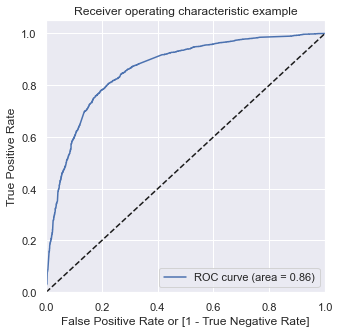

In [86]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding the optimal Point

In [87]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.162049,609431,0,1,1,0,0,0,0,0,0,0,0
1,0,0.054279,631817,0,1,0,0,0,0,0,0,0,0,0
2,0,0.032392,596164,0,1,0,0,0,0,0,0,0,0,0
3,0,0.134070,646570,0,1,1,0,0,0,0,0,0,0,0
4,0,0.018993,643974,0,1,0,0,0,0,0,0,0,0,0


In [88]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.420686  0.997161  0.065467
0.1   0.1  0.555659  0.977291  0.295852
0.2   0.2  0.666667  0.937956  0.499500
0.3   0.3  0.760513  0.867397  0.694653
0.4   0.4  0.794372  0.775750  0.805847
0.5   0.5  0.787570  0.624088  0.888306
0.6   0.6  0.765152  0.502839  0.926787
0.7   0.7  0.742579  0.397405  0.955272
0.8   0.8  0.694341  0.235604  0.977011
0.9   0.9  0.672542  0.160178  0.988256


<Figure size 1440x1080 with 0 Axes>

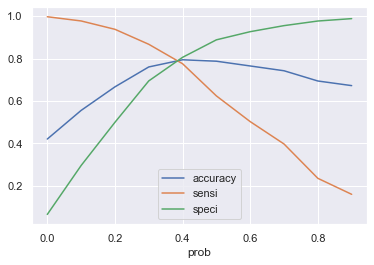

In [89]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

# plt.savefig('acc_s_s_curve',dpi=300,transparent=True)

plt.show()

Inference : Taking value 3.7 as the Final Cutoff

In [90]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.162049,609431,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.054279,631817,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.032392,596164,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.134070,646570,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.018993,643974,0,1,0,0,0,0,0,0,0,0,0,0


In [91]:
# Printing the Metrics Accuracy, Sensitivity, Specicity

acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print('Accuracy: {}, Sensitivity {}, specifitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.7860235003092146, Sensitivity 0.8098134630981346, specifitiy 0.7713643178410795  


In [92]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3555,  447],
       [ 927, 1539]], dtype=int64)

In [93]:
# Finding the Precision Score

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.685782967032967

In [94]:
# Finding the Recall Score

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8098134630981346

In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

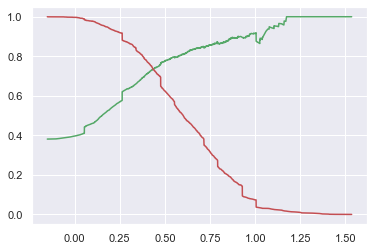

In [96]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')

# plt.savefig('precision-recall_curve',dpi=300,transparent=True)

plt.show()

Inference : Here we got 0.37 as the Cut-off as Precesion-Recall Thresholdm

# Making Prediction on test set

## Scaling on Test Set

In [97]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])


In [98]:
#Adding constant

X_test_sm = sm.add_constant(X_test[col])

#Making prediction

y_test_pred = logm6.predict(X_test_sm)
y_test_pred[:10]

Lead Number
639211    0.792405
590711    0.871184
644174    0.482273
641392    0.311112
587955    0.742193
593130    0.126724
648319    0.054279
636722    0.949053
648231    0.763262
637858    0.233242
dtype: float64

In [99]:
# Converting y_pred to a dataframe which is an array

y_pred_test = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [100]:
# Removing index for both dataframes to append them side by side 

y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [101]:
# Appending y_test_df and y_pred_test

y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)

# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [102]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,639211,0.792405
1,1,590711,0.871184
2,1,644174,0.482273
3,0,641392,0.311112
4,1,587955,0.742193


In [103]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [104]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted
0,1,639211,0.792405,1
1,1,590711,0.871184,1
2,1,644174,0.482273,1
3,0,641392,0.311112,0
4,1,587955,0.742193,1


In [105]:
acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)

In [106]:
print('Accuracy: {}, Sensitivity {}, specitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.7738095238095238, Sensitivity 0.7981735159817351, specitiy 0.7579010137149672  


Inference : model is doing well in test set also

Sensitivity means how our model is telling that actually converted and model prdecited them as as converted.

model is giving about .80 sensitivity.

it means that 80 percent time our model is able to predict (actually)converted as (prdicited)converted.

## Assigning Lead Score in the data frame with respect to Lead Number

In [107]:
# making new df with lead score

lead_scorer_df=pd.DataFrame()
df1=y_train_pred_final[['Lead Number','Converted_Prob']]
df2=y_pred_final[['Lead Number','Converted_Prob']]

In [108]:
lead_scorer_df=df1.append(df2,ignore_index=True)

In [109]:
# Assigning the value to the Lead Score by Multiplying 100

lead_scorer_df['Lead Score']=lead_scorer_df['Converted_Prob'].apply(lambda x: round((x*100),2))

In [110]:
# dropping Converted_Prob

lead_scorer_df.drop('Converted_Prob',1,inplace=True)
lead_scorer_df.head()

,Lead Number,Lead Score
0,609431,16.20
1,631817,5.43
2,596164,3.24
3,646570,13.41
4,643974,1.90


Inference : Got the Lead Score with respect to Lead Number

# Conclusion :-
We have noted that the variables that important the most in the potential buyers are:

The total time spend on the Website.

Total number of visits.

When the lead source was: a. Google b. Direct traffic c. Organic search d. Olark Chat

When the last activity was: a. SMS b. Olark chat conversation

When the lead origin is Lead add format.